### Gender Bias Detection and Fairness Evaluation using Fairlearn on the Cardiovascular Disease Dataset
(Source: https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset/data)

In [1]:
#installation
!pip install fairlearn


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: C:\Users\patri\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
# import libraries
from fairlearn.metrics import (
    MetricFrame, selection_rate,
    false_positive_rate, false_negative_rate,
    true_positive_rate, true_negative_rate,
    demographic_parity_difference, equalized_odds_difference
)
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, brier_score_loss
)

### Bias detection for KNN

In [3]:
import pandas as pd

# Load KNN results
knn_df = pd.read_csv("CVDKaggleData_50F50M__tunedKNN_predictions.csv")

print(knn_df.head())

   gender  y_true    y_prob  y_pred
0       0       0  0.517241       1
1       0       0  0.793103       1
2       1       0  0.413793       0
3       0       0  0.275862       0
4       0       0  0.172414       0


In [4]:
# Extract common columns
y_true_knn = knn_df["y_true"].values
y_prob_knn = knn_df["y_prob"].values
y_pred_knn = knn_df["y_pred"].values
gender_knn = knn_df["gender"].values

# Use gender_knn as the protected attribute (0/1 as in our CSV)
protected_attr_knn = gender_knn

print("Example rows:\n", knn_df.head())

Example rows:
    gender  y_true    y_prob  y_pred
0       0       0  0.517241       1
1       0       0  0.793103       1
2       1       0  0.413793       0
3       0       0  0.275862       0
4       0       0  0.172414       0


In [5]:
# y_pred_knn already generated
# protected_attr = gender column (0=female, 1=male)

# Demographic Parity Difference
dp_diff_knn = demographic_parity_difference(y_true_knn, y_pred_knn, sensitive_features=protected_attr_knn)

# Equalized Odds Difference
eod_diff_knn = equalized_odds_difference(y_true_knn, y_pred_knn, sensitive_features=protected_attr_knn)

print("DPD and EPD - KNN")
print(f"Demographic Parity Difference: {dp_diff_knn:.4f}")
print(f"Equalized Odds Difference: {eod_diff_knn:.4f}")

DPD and EPD - KNN
Demographic Parity Difference: 0.0071
Equalized Odds Difference: 0.0060


### Fairness Metrics – KNN Model  

To evaluate fairness, we examine two group fairness measures: **Demographic Parity Difference (DPD)** and **Equalized Odds Difference (EOD)**.  

---

#### Results
- **Demographic Parity Difference (DPD): 0.0071**  
  - This very small value (close to 0) indicates that the **selection rates between females and males are nearly identical**.  
  - The model does not show meaningful bias in terms of how often each gender is predicted as positive.  

- **Equalized Odds Difference (EOD): 0.0060**  
  - Again, a very small value, suggesting that **error rates (TPR and FPR) are balanced across genders**.  
  - This means the model performs similarly for males and females in terms of both sensitivity and specificity.  

---

#### **Summary**
The KNN model exhibits **very low disparities** across both demographic parity and equalized odds.  
- Predictions and error rates are **highly consistent across genders**, implying that KNN is a **fair model** under these metrics.  
- While other fairness measures may still show nuances, these results suggest **minimal gender bias** in terms of group-level outcomes.

---

In [6]:
# MetricFrame for extended analysis - define metrics
from fairlearn.metrics import MetricFrame, selection_rate, false_positive_rate, true_positive_rate
import matplotlib.pyplot as plt
metrics = {
    "accuracy": accuracy_score,
    "precision": precision_score,
    "recall": recall_score,
    "f1": f1_score, 
    "selection_rate": selection_rate,
    "tpr": true_positive_rate,
    "fpr": false_positive_rate,
    "tnr": true_negative_rate,
    "fnr": false_negative_rate,
}


KNN Fairness Metrics by Gender:
                     accuracy  precision    recall        f1  selection_rate  \
sensitive_feature_0                                                            
0                    0.699946   0.697351  0.707383  0.702331        0.507607   
1                    0.702106   0.694202  0.705790  0.699948        0.500514   

                          tpr       fpr       tnr       fnr  
sensitive_feature_0                                          
0                    0.707383  0.307504  0.692496  0.292617  
1                    0.705790  0.301467  0.698533  0.294210  


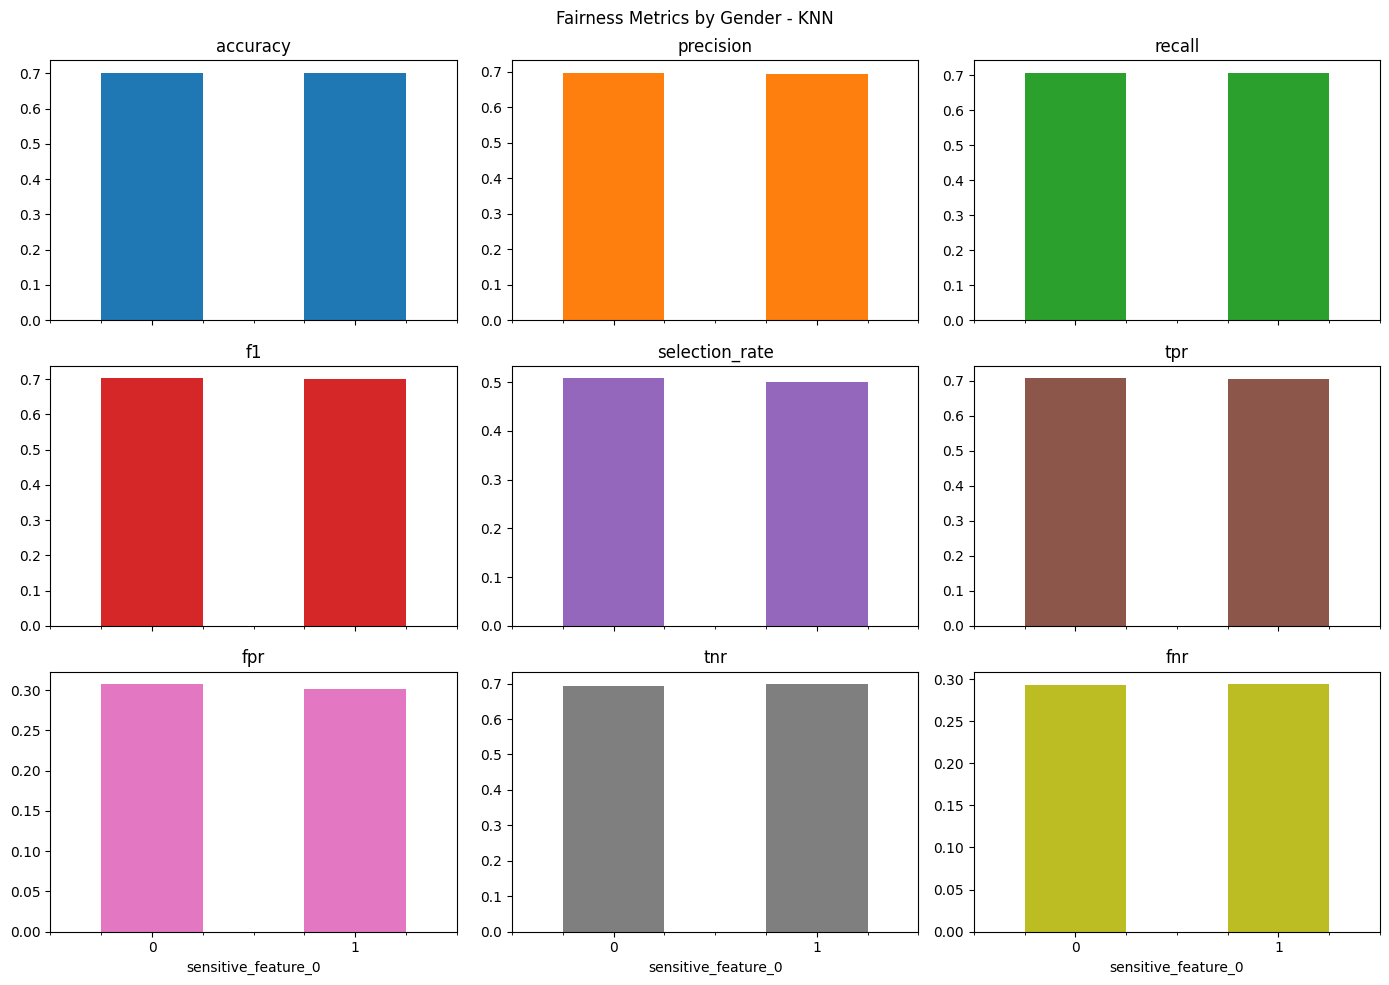


Between-group differences (max group − min group):
accuracy          0.002160
precision         0.003149
recall            0.001593
f1                0.002383
selection_rate    0.007093
tpr               0.001593
fpr               0.006037
tnr               0.006037
fnr               0.001593
dtype: float64

Between-group ratios (min / max):
accuracy          0.996923
precision         0.995485
recall            0.997748
f1                0.996607
selection_rate    0.986027
tpr               0.997748
fpr               0.980367
tnr               0.991357
fnr               0.994586
dtype: float64

Disparate Impact Ratio (selection rate): 0.9860
Equality of Opportunity Difference (TPR gap): 0.0016


In [7]:
# MetricFrame
metric_frame_knn = MetricFrame(
    metrics=metrics,
    y_true=y_true_knn,
    y_pred=y_pred_knn,
    sensitive_features=protected_attr_knn
)

print("\nKNN Fairness Metrics by Gender:")
print(metric_frame_knn.by_group)

metric_frame_knn.by_group.plot.bar(
    subplots=True,
    layout=[3, 3],
    figsize=(14, 10),
    legend=False,
    rot=0
)
plt.suptitle("Fairness Metrics by Gender - KNN")
plt.tight_layout()
plt.show()

# Group summaries (use the right variable name)
print("\nBetween-group differences (max group − min group):")
print(metric_frame_knn.difference())

print("\nBetween-group ratios (min / max):")
print(metric_frame_knn.ratio())

# Disparate Impact Ratio (selection_rate ratio)
dir_value_knn = metric_frame_knn.ratio()["selection_rate"]
print(f"\nDisparate Impact Ratio (selection rate): {dir_value_knn:.4f}")

# Demographic Parity Ratio (aka Disparate Impact Ratio)
dp_ratio_knn = metric_frame_knn.ratio()["selection_rate"]

#Equality of Opportunity (difference in TPR between groups)
eop_diff_knn = metric_frame_knn.difference()["tpr"]
print(f"Equality of Opportunity Difference (TPR gap): {eop_diff_knn:.4f}")

## Fairness Metrics by Gender – KNN Model  

The table and plots show performance and fairness outcomes for the **KNN classifier** across gender groups, with **0 = Female (unprivileged)** and **1 = Male (privileged)**.

---

### 1. Performance Across Groups
- **Accuracy**:  
  - Female: **0.6999**  
  - Male: **0.7021**  
  ➝ Practically identical, with a negligible gap (**0.0022**).

- **Precision**:  
  - Female: **0.6974**  
  - Male: **0.6942**  
  ➝ Nearly identical, showing predictions are equally reliable across genders.

- **Recall (TPR)**:  
  - Female: **0.7074**  
  - Male: **0.7058**  
  ➝ Very close, with a tiny gap (**0.0016**), suggesting balanced sensitivity.

- **F1 Score**:  
  - Female: **0.7023**  
  - Male: **0.6999**  
  ➝ No meaningful difference in the balance of precision and recall.

---

### 2. Fairness Metrics
- **Selection Rate**:  
  - Female: **0.5076**, Male: **0.5005**  
  - **Disparate Impact Ratio**: **0.9860** (well within the fairness threshold 0.80–1.25).  

- **True Positive Rate (TPR)**:  
  - Female: **0.7074**, Male: **0.7058**  
  - **Equality of Opportunity Difference**: **0.0016** → almost perfectly fair.  

- **False Positive Rate (FPR)**:  
  - Female: **0.3075**, Male: **0.3015**  
  - Gap is tiny (**0.0060**), meaning misclassification risk is nearly balanced.  

- **Other Error Metrics (TNR, FNR)**:  
  - Differences are minimal (<0.007), confirming strong consistency.  

---

### 3. Between-Group Differences & Ratios
- **Maximum differences** across metrics are very small (≤0.007).  
- **Between-group ratios** are very close to 1 (≥0.98), signaling balanced treatment.  

---

### **Summary**
The **KNN model demonstrates strong fairness across gender groups**:  
- Accuracy, precision, recall, and F1 are nearly identical.  
- Selection rates and error rates (TPR, FPR, TNR, FNR) show only **minimal disparities**.  
- Both **Disparate Impact Ratio (0.986)** and **Equality of Opportunity Difference (0.0016)** fall within acceptable fairness thresholds.  

➡️ Overall, the KNN model is **highly fair with respect to gender**, showing no systematic bias in predictions or error distributions.

---

In [8]:
y_score_knn = knn_df["y_prob"].values   

#Probabilistic metrics by group using y_prob_knn
def roc_auc_safe(y_true, y_score):
    try:
        return roc_auc_score(y_true, y_score)
    except ValueError:
        # Happens if a group has only one class in y_true
        return np.nan

auc_mf_knn = MetricFrame(
    metrics={"roc_auc": roc_auc_safe},
    y_true=y_true_knn,
    y_pred=y_prob_knn,                     
    sensitive_features=protected_attr_knn
)
print("\nKNN - ROC-AUC by group:")
print(auc_mf_knn.by_group)

brier_mf_knn = MetricFrame(
    metrics={"brier": brier_score_loss},
    y_true=y_true_knn,
    y_pred=y_prob_knn,                     
    sensitive_features=protected_attr_knn
)
print("\nKNN- Brier score by group (lower is better):")
print(brier_mf_knn.by_group)


KNN - ROC-AUC by group:
                      roc_auc
sensitive_feature_0          
0                    0.763910
1                    0.756895

KNN- Brier score by group (lower is better):
                        brier
sensitive_feature_0          
0                    0.197803
1                    0.200588


## Group-Specific ROC-AUC and Brier Score – KNN Model  

This section evaluates the **discriminatory power (ROC-AUC)** and **calibration quality (Brier score)** of the KNN model across gender groups, with **0 = Female (unprivileged)** and **1 = Male (privileged)**.

---

### 1. ROC-AUC (Discriminatory Ability)  
- **Female (0):** 0.764  
- **Male (1):** 0.757  

➡️ Both groups achieve **similar ROC-AUC values**, indicating the model ranks positive vs. negative cases almost equally well for both genders.  
The small gap (**0.007**) shows **nearly equal discrimination power** across groups.  

---

### 2. Brier Score (Calibration – lower is better)  
- **Female (0):** 0.198  
- **Male (1):** 0.201  

➡️ Both groups have **comparable Brier scores**, reflecting well-calibrated probability estimates.  
The slightly lower score for females indicates **marginally better calibration** for this group, but the difference is minimal (**0.003**).  

---

### **Summary**  
The KNN model shows **balanced performance across genders** in terms of both **ROC-AUC (ranking ability)** and **Brier score (calibration)**.  
- **No meaningful disparities** are observed between females and males.  
- The model is **equally fair and reliable** in separating outcomes and producing calibrated predictions for both groups.  

---

### Bias detection for the Decision Tree Model

In [9]:
# Load DT results
dt_df = pd.read_csv("CVDKaggleData_50F50M_DT_tunedpruned_predictions.csv")
print(dt_df.head())

   gender  y_true  y_pred_dt    y_prob
0       0       0          0  0.301981
1       0       0          1  0.862548
2       1       0          0  0.301981
3       0       0          0  0.301981
4       0       0          0  0.301981


In [10]:
import re

# Extract common columns
y_true_dt = dt_df["y_true"].values
y_prob_dt = dt_df["y_prob"].values
y_pred_dt = dt_df["y_pred_dt"].values
gender_dt = dt_df["gender"].values


# Use gender_knn as the protected attribute (0/1 as in your CSV)
protected_attr_dt = gender_dt


print("Example rows:\n", dt_df.head())

Example rows:
    gender  y_true  y_pred_dt    y_prob
0       0       0          0  0.301981
1       0       0          1  0.862548
2       1       0          0  0.301981
3       0       0          0  0.301981
4       0       0          0  0.301981


In [11]:
# Demographic Parity Difference
dp_diff_dt = demographic_parity_difference(y_true_dt, y_pred_dt, sensitive_features=protected_attr_dt)

# Equalized Odds Difference
eod_diff_dt = equalized_odds_difference(y_true_dt, y_pred_dt, sensitive_features=protected_attr_dt)

print("DPD and EOD - DT")
print(f"Demographic Parity Difference: {dp_diff_dt:.4f}")
print(f"Equalized Odds Difference: {eod_diff_dt:.4f}")

DPD and EOD - DT
Demographic Parity Difference: 0.0254
Equalized Odds Difference: 0.0357


## Fairness Metrics – Decision Tree (DT)

This section reports the **Demographic Parity Difference (DPD)** and **Equalized Odds Difference (EOD)** for the Decision Tree model.  
Both metrics quantify disparities between the unprivileged group (females) and the privileged group (males).

---

### 1. Demographic Parity Difference (DPD)  
- **Value: 0.0254**  
➡️ This indicates a **small disparity in selection rates** between genders.  
A DPD close to zero means both groups are selected at nearly equal rates, so the model shows **minimal demographic bias**.

---

### 2. Equalized Odds Difference (EOD)  
- **Value: 0.0357**  
➡️ This reflects differences in **true positive rates (TPR) and false positive rates (FPR)** across genders.  
The low value suggests that the model achieves **comparable error rates for females and males**, with only minor deviations.

---

### **Summary**  
- The **Decision Tree model exhibits low bias** with respect to both demographic parity and equalized odds.  
- Small differences (≈ 0.02–0.04) imply that the model treats males and females in a **largely equitable manner**, with **no substantial fairness concerns** detected in these group fairness measures.  

---


DT Fairness Metrics by Gender:
                     accuracy  precision    recall        f1  selection_rate  \
sensitive_feature_0                                                            
0                    0.715702   0.728921  0.687568  0.707641        0.472018   
1                    0.708783   0.702117  0.709442  0.705760        0.497432   

                          tpr       fpr       tnr       fnr  
sensitive_feature_0                                          
0                    0.687568  0.256117  0.743883  0.312432  
1                    0.709442  0.291856  0.708144  0.290558  


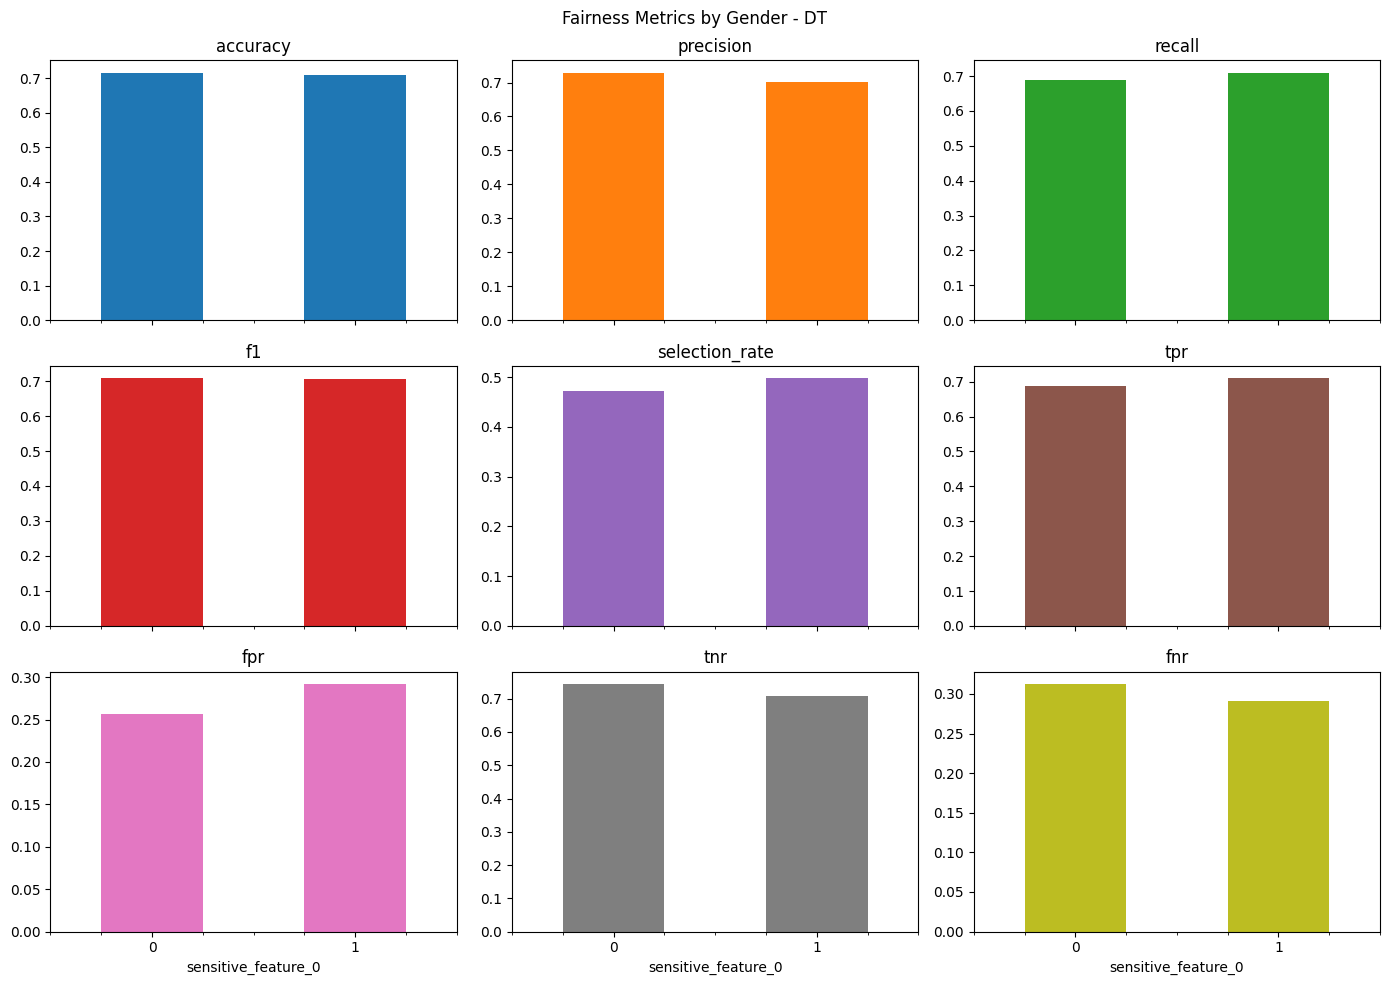


Between-group differences (max group − min group):
accuracy          0.006920
precision         0.026804
recall            0.021874
f1                0.001880
selection_rate    0.025413
tpr               0.021874
fpr               0.035739
tnr               0.035739
fnr               0.021874
dtype: float64

Between-group ratios (min / max):
accuracy          0.990332
precision         0.963228
recall            0.969167
f1                0.997343
selection_rate    0.948911
tpr               0.969167
fpr               0.877546
tnr               0.951956
fnr               0.929988
dtype: float64

Disparate Impact Ratio (selection rate): 0.9489
Equality of Opportunity Difference (TPR gap): 0.0219


In [12]:
# MetricFrame
metric_frame_dt = MetricFrame(
    metrics=metrics,
    y_true=y_true_dt,
    y_pred=y_pred_dt,
    sensitive_features=protected_attr_dt
)

print("\nDT Fairness Metrics by Gender:")
print(metric_frame_dt.by_group)

metric_frame_dt.by_group.plot.bar(
    subplots=True,
    layout=[3, 3],
    figsize=(14, 10),
    legend=False,
    rot=0
)
plt.suptitle("Fairness Metrics by Gender - DT")
plt.tight_layout()
plt.show()

# Group summaries (use the right variable name)
print("\nBetween-group differences (max group − min group):")
print(metric_frame_dt.difference())

print("\nBetween-group ratios (min / max):")
print(metric_frame_dt.ratio())

# Disparate Impact Ratio (selection_rate ratio)
dir_value_dt = metric_frame_dt.ratio()["selection_rate"]
print(f"\nDisparate Impact Ratio (selection rate): {dir_value_dt:.4f}")

# Demographic Parity Ratio (aka Disparate Impact Ratio)
dp_ratio_dt = metric_frame_dt.ratio()["selection_rate"]

#Equality of Opportunity (difference in TPR between groups)
eop_diff_dt = metric_frame_dt.difference()["tpr"]
print(f"Equality of Opportunity Difference (TPR gap): {eop_diff_dt:.4f}")

## Fairness Metrics by Gender – Decision Tree (DT) Model  

The table and plots show performance and fairness outcomes for the **Decision Tree classifier** across gender groups, with **0 = Female (unprivileged)** and **1 = Male (privileged)**.  

---

### 1. Performance Across Groups
- **Accuracy**:  
  - Female: **0.7157**  
  - Male: **0.7088**  
  ➝ Very close, with only a small gap (**0.0069**).  

- **Precision**:  
  - Female: **0.7289**  
  - Male: **0.7021**  
  ➝ Females benefit from slightly higher reliability in positive predictions (**+0.027** gap).  

- **Recall (TPR)**:  
  - Female: **0.6876**  
  - Male: **0.7094**  
  ➝ Males have a modest advantage in sensitivity (**+0.022** gap).  

- **F1 Score**:  
  - Female: **0.7076**  
  - Male: **0.7058**  
  ➝ Nearly identical balance between precision and recall.  

---

### 2. Fairness Metrics
- **Selection Rate**:  
  - Female: **0.4720**, Male: **0.4974**  
  - **Disparate Impact Ratio**: **0.9489** → within the fairness threshold (0.80–1.25), but showing a slight male advantage.  

- **True Positive Rate (TPR)**:  
  - Female: **0.6876**, Male: **0.7094**  
  - **Equality of Opportunity Difference**: **0.0219**, indicating a small sensitivity gap favoring males.  

- **False Positive Rate (FPR)**:  
  - Female: **0.2561**, Male: **0.2919**  
  - Males experience a slightly higher false alarm rate (**+0.036 gap**).  

- **Other Error Metrics (TNR, FNR)**:  
  - Small to moderate differences (<0.036), with males having higher FPR but also higher recall.  

---

### 3. Between-Group Differences & Ratios
- **Maximum differences** across metrics remain modest (≤0.036).  
- **Between-group ratios** mostly range from **0.87 to 0.99**, indicating generally balanced outcomes, though precision favors females and recall favors males.  

---

### **Summary**
The **Decision Tree model shows moderate fairness across genders**:  
- Accuracy and F1 are nearly identical, suggesting overall parity in predictive performance.  
- **Females benefit from higher precision**, while **males benefit from higher recall (TPR)**.  
- Selection rates are slightly higher for males, but the **Disparate Impact Ratio (0.949)** is within fairness bounds.  
- Error rates (FPR/TNR) differ modestly, with males more likely to face false positives.  

➡️ Overall, the DT model is **reasonably fair**, with small trade-offs: females enjoy more reliable predictions, while males see slightly higher sensitivity but also higher false positives.  

---

In [13]:
import numpy as np

y_score_dt = dt_df["y_prob"].values   

#Probabilistic metrics by group using y_prob_dt
def roc_auc_safe(y_true=y_true_dt, y_score_dt=y_score_dt):
    try:
        return roc_auc_score(y_true, y_score_dt)
    except ValueError:
        # Happens if a group has only one class in y_true
        return np.nan

auc_mf_dt = MetricFrame(
    metrics={"roc_auc": roc_auc_safe},
    y_true=y_true_dt,
    y_pred=y_prob_dt,                     
    sensitive_features=protected_attr_dt
)
print("\nDT - ROC-AUC by group:")
print(auc_mf_dt.by_group)

brier_mf_dt = MetricFrame(
    metrics={"brier": brier_score_loss},
    y_true=y_true_dt,
    y_pred=y_prob_dt,                     
    sensitive_features=protected_attr_dt
)
print("\nDT - Brier score by group (lower is better):")
print(brier_mf_dt.by_group)


DT - ROC-AUC by group:
                      roc_auc
sensitive_feature_0          
0                    0.741043
1                    0.736387

DT - Brier score by group (lower is better):
                        brier
sensitive_feature_0          
0                    0.198296
1                    0.201663


## ROC-AUC and Brier Score by Gender – Decision Tree (DT) Model  

This analysis shows the **discriminatory ability (ROC-AUC)** and **calibration quality (Brier score)** of the Decision Tree model, stratified by gender groups, with **0 = Female (unprivileged)** and **1 = Male (privileged)**.  

---

### 1. ROC-AUC (Ranking Performance)
- **Female (0): 0.7410**  
- **Male (1): 0.7364**  
➝ Both groups show **very similar ROC-AUC values**, with a minimal gap (**0.0046**).  
This indicates that the DT model ranks positive vs. negative cases almost equally well across genders.  

---

### 2. Brier Score (Calibration Performance – lower is better)
- **Female (0): 0.1983**  
- **Male (1): 0.2017**  
➝ Calibration quality is also very close, with only a small difference (**0.0034**).  
Females benefit from slightly better probability calibration, but the difference is negligible.  

---

### **Summary**
The **Decision Tree model demonstrates consistent ranking ability and probability calibration across genders**:  
- ROC-AUC differences are **tiny (<0.005)**, showing no meaningful bias in discriminatory performance.  
- Brier scores are **nearly identical**, suggesting well-balanced calibration.  

➡️ Overall, the DT model shows **highly equitable performance between females and males** when evaluated with ROC-AUC and Brier score.  

---

### Bias detection for the Random Forest Model

In [14]:
rf_df = pd.read_csv("CVDKaggleData_50M50F_RF_tuned_predictions.csv")
print(rf_df.head())

   gender  y_true  y_pred_rf    y_prob
0       0       0          0  0.363411
1       0       0          1  0.812063
2       1       0          0  0.313309
3       0       0          0  0.276039
4       0       0          0  0.319559


In [15]:
# Extract common columns
y_true_rf = rf_df["y_true"].values
y_pred_rf = rf_df["y_pred_rf"].values
y_prob_rf = rf_df["y_prob"].values
gender_rf = rf_df["gender"].values


# Use gender_knn as the protected attribute (0/1 as in your CSV)
protected_attr_rf = gender_rf


print("Example rows:\n", rf_df.head())

Example rows:
    gender  y_true  y_pred_rf    y_prob
0       0       0          0  0.363411
1       0       0          1  0.812063
2       1       0          0  0.313309
3       0       0          0  0.276039
4       0       0          0  0.319559


In [16]:
# Demographic Parity Difference
dp_diff_rf = demographic_parity_difference(y_true_rf, y_pred_rf, sensitive_features=protected_attr_rf)

# Equalized Odds Difference
eod_diff_rf = equalized_odds_difference(y_true_rf, y_pred_rf, sensitive_features=protected_attr_rf)

print("DPD and EOD - RF")
print(f"Demographic Parity Difference: {dp_diff_rf:.4f}")
print(f"Equalized Odds Difference: {eod_diff_rf:.4f}")

DPD and EOD - RF
Demographic Parity Difference: 0.0155
Equalized Odds Difference: 0.0215


## Fairness Metrics – Random Forest (RF)  

This section evaluates **group fairness** of the Random Forest model using **Demographic Parity Difference (DPD)** and **Equalized Odds Difference (EOD)**.  

---

### 1. Demographic Parity Difference (DPD)  
- **Value: 0.0155**  
- This is a **very small gap** in the overall selection rates between males (privileged) and females (unprivileged).  
- Since |DPD| < 0.05, the model satisfies demographic parity to a high degree, showing **balanced prediction outcomes across gender groups**.  

---

### 2. Equalized Odds Difference (EOD)  
- **Value: 0.0215**  
- This reflects the difference in **error rates (TPR and FPR)** between genders.  
- A value close to zero indicates that both groups experience **similar sensitivity and false positive rates**.  
- With EOD ≈ 0.02, the model shows **minimal disparity** in how it distributes errors across groups.  

---

### **Summary**  
The **Random Forest model exhibits strong fairness properties**:  
- Prediction rates are nearly identical across genders (**low DPD**).  
- Error rates (true positives and false positives) are also well balanced (**low EOD**).  
- Both metrics fall within acceptable fairness thresholds, suggesting the RF model is **equitable and does not introduce significant gender bias**.  

---


Random Forest Fairness Metrics by Gender:
                     accuracy  precision    recall        f1  selection_rate  \
sensitive_feature_0                                                            
0                    0.709997   0.728533  0.670195  0.698148        0.460337   
1                    0.707756   0.710200  0.686489  0.698143        0.475860   

                          tpr       fpr       tnr       fnr  
sensitive_feature_0                                          
0                    0.670195  0.250136  0.749864  0.329805  
1                    0.686489  0.271624  0.728376  0.313511  


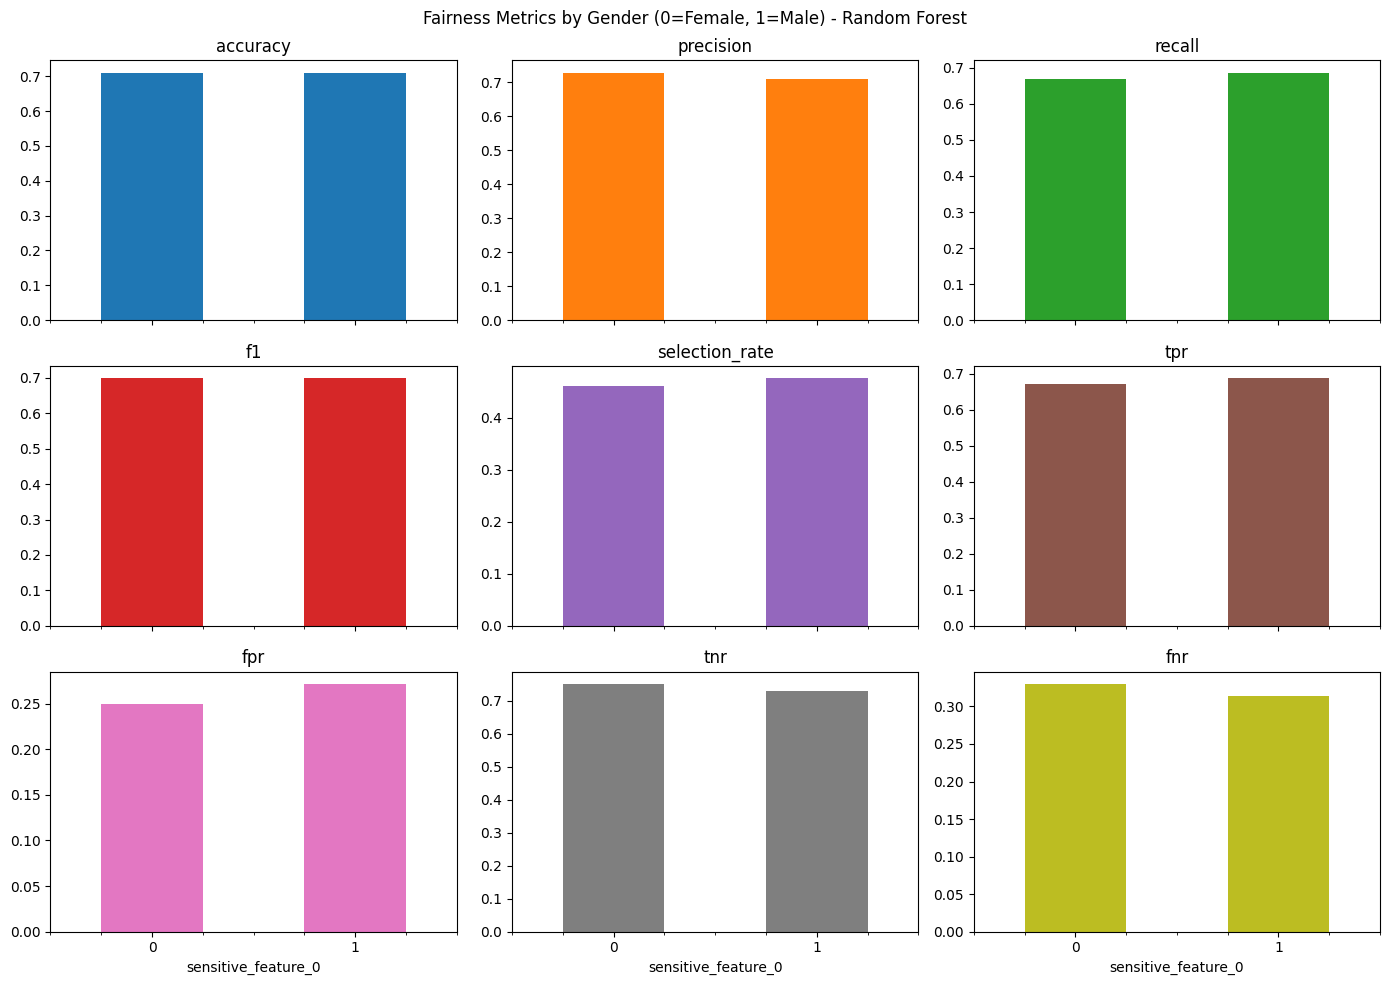


Between-group differences (max group − min group):
accuracy          0.002242
precision         0.018334
recall            0.016294
f1                0.000005
selection_rate    0.015523
tpr               0.016294
fpr               0.021488
tnr               0.021488
fnr               0.016294
dtype: float64

Between-group ratios (min / max):
accuracy          0.996843
precision         0.974835
recall            0.976265
f1                0.999993
selection_rate    0.967378
tpr               0.976265
fpr               0.920892
tnr               0.971345
fnr               0.950595
dtype: float64

Disparate Impact Ratio (selection rate): 0.9674
Equality of Opportunity Difference (TPR gap): 0.0163


In [17]:
#MetricFrame for extended analysis
metric_frame_rf = MetricFrame(
    metrics=metrics,
    y_true=y_true_rf,
    y_pred=y_pred_rf,
    sensitive_features=protected_attr_rf
)

print("\nRandom Forest Fairness Metrics by Gender:")
print(metric_frame_rf.by_group)

metric_frame_rf.by_group.plot.bar(
    subplots=True,
    layout=[3, 3],
    figsize=(14, 10),
    legend=False,
    rot=0
)
plt.suptitle("Fairness Metrics by Gender (0=Female, 1=Male) - Random Forest")
plt.tight_layout()
plt.show()

# Group summaries 
print("\nBetween-group differences (max group − min group):")
print(metric_frame_rf.difference())

print("\nBetween-group ratios (min / max):")
print(metric_frame_rf.ratio())

# Disparate Impact Ratio (selection_rate ratio)
dir_value_rf = metric_frame_rf.ratio()["selection_rate"]
print(f"\nDisparate Impact Ratio (selection rate): {dir_value_rf:.4f}")

# Demographic Parity Ratio (aka Disparate Impact Ratio)
dp_ratio_rf = metric_frame_rf.ratio()["selection_rate"]

#Equality of Opportunity (difference in TPR between groups)
eop_diff_rf = metric_frame_rf.difference()["tpr"]
print(f"Equality of Opportunity Difference (TPR gap): {eop_diff_rf:.4f}")

## Fairness Metrics by Gender – Random Forest Model  

The table and plots show performance and fairness outcomes for the **Random Forest classifier** across gender groups, with **0 = Female (unprivileged)** and **1 = Male (privileged)**.  

---

### 1. Performance Across Groups
- **Accuracy**:  
  - Female: **0.7100**  
  - Male: **0.7078**  
  ➝ Practically identical, with a negligible gap (**0.0022**).  

- **Precision**:  
  - Female: **0.7285**  
  - Male: **0.7102**  
  ➝ Slightly higher precision for females, meaning positive predictions are a bit more reliable for them.  

- **Recall (TPR)**:  
  - Female: **0.6702**  
  - Male: **0.6865**  
  ➝ Males benefit from slightly higher sensitivity (**+0.0163 gap**).  

- **F1 Score**:  
  - Female: **0.6981**  
  - Male: **0.6981**  
  ➝ Identical, showing a balanced trade-off between precision and recall across groups.  

---

### 2. Fairness Metrics
- **Selection Rate**:  
  - Female: **0.4603**, Male: **0.4759**  
  - **Disparate Impact Ratio**: **0.9674** → well within the acceptable fairness threshold (0.80–1.25).  

- **True Positive Rate (TPR)**:  
  - Female: **0.6702**, Male: **0.6865**  
  - **Equality of Opportunity Difference**: **0.0163**, indicating a very small advantage for males in correct positive classification.  

- **False Positive Rate (FPR)**:  
  - Female: **0.2501**, Male: **0.2716**  
  - Males experience a slightly higher false alarm rate.  

- **Other Error Metrics (TNR, FNR)**:  
  - Differences are small (~0.02), showing that error distributions are largely balanced.  

---

### 3. Between-Group Differences & Ratios
- **Maximum differences** across metrics remain very small (≤0.022).  
- **Between-group ratios** are close to 1 (≥0.92), confirming near-parity across genders.  

---

### **Summary**
The **Random Forest model demonstrates strong fairness across gender groups**:  
- Accuracy and F1 are virtually identical.  
- Small disparities exist: females show slightly higher precision, while males benefit from marginally higher recall.  
- Both **Disparate Impact Ratio (0.9674)** and **Equality of Opportunity Difference (0.0163)** fall within acceptable fairness thresholds.  

➡️ Overall, the Random Forest model is **fair with respect to gender**, with only **minor disparities that do not indicate systematic bias**.  

---

In [18]:
import numpy as np

y_score_rf = rf_df["y_prob"].values   

#Probabilistic metrics by group using y_prob_dt
def roc_auc_safe(y_true=y_true_rf, y_score_rf=y_score_rf):
    try:
        return roc_auc_score(y_true, y_score_rf)
    except ValueError:
        # Happens if a group has only one class in y_true
        return np.nan

auc_mf_rf = MetricFrame(
    metrics={"roc_auc": roc_auc_safe},
    y_true=y_true_rf,
    y_pred=y_prob_rf,                     
    sensitive_features=protected_attr_rf
)
print("\nRF -ROC-AUC by group:")
print(auc_mf_rf.by_group)

brier_mf_rf = MetricFrame(
    metrics={"brier": brier_score_loss},
    y_true=y_true_rf,
    y_pred=y_prob_rf,                     
    sensitive_features=protected_attr_rf
)
print("\nRF - Brier score by group (lower is better):")
print(brier_mf_rf.by_group)


RF -ROC-AUC by group:
                      roc_auc
sensitive_feature_0          
0                    0.771468
1                    0.757800

RF - Brier score by group (lower is better):
                        brier
sensitive_feature_0          
0                    0.194271
1                    0.200556


## Random Forest – ROC-AUC and Brier Score by Gender  

The following results evaluate **discrimination ability (ROC-AUC)** and **calibration quality (Brier score)** of the Random Forest model across gender groups, with **0 = Female (unprivileged)** and **1 = Male (privileged)**.  

---

### 1. ROC-AUC (Ranking Ability)
- **Female (0): 0.7715**  
- **Male (1): 0.7578**  

➡️ The model achieves slightly better ranking performance for females, meaning it is more effective at distinguishing between positive and negative cases in this group.  
The difference (~0.014) is **small**, but it suggests a marginal advantage for females in terms of ROC-based discrimination.  

---

### 2. Brier Score (Calibration – lower is better)
- **Female (0): 0.1943**  
- **Male (1): 0.2006**  

➡️ Predictions for females are **better calibrated** (closer to true probabilities), while predictions for males show slightly higher error in probability estimation.  
The difference (~0.0063) is modest but consistent with fairer calibration for the female group.  

---

### **Summary**
- The Random Forest model performs **slightly better for females** in both ROC-AUC and Brier score.  
- While the differences are relatively small, they indicate that females may benefit from **more accurate ranking and probability calibration** than males.  
- Importantly, the gaps are minor and do not suggest severe imbalance, but they show that fairness concerns lean toward a **slight disadvantage for males** in this evaluation.  

---

### Bias detection for MLP

In [19]:
mlp_df = pd.read_csv("CVDKaggleData_50M50F_MLP_adamtuned_predictions.csv")
print(mlp_df.head())

   gender  y_true  y_pred    y_prob
0       0       0       0  0.321685
1       0       0       1  0.868185
2       1       0       0  0.412735
3       0       0       0  0.285116
4       0       0       0  0.242904


In [20]:
# Extract common columns 
y_true_mlp = mlp_df["y_true"].values 
y_prob_mlp = mlp_df["y_prob"].values
y_pred_mlp = mlp_df["y_pred"].values
gender_mlp = mlp_df["gender"].values 

# Use gender_mlp as the protected attribute
protected_attr_mlp = gender_mlp 


print("Example rows:\n", mlp_df.head())

Example rows:
    gender  y_true  y_pred    y_prob
0       0       0       0  0.321685
1       0       0       1  0.868185
2       1       0       0  0.412735
3       0       0       0  0.285116
4       0       0       0  0.242904


In [21]:
# Demographic Parity Difference
dp_diff_mlp = demographic_parity_difference(y_true_mlp, y_pred_mlp, sensitive_features=protected_attr_mlp)

# Equalized Odds Difference
eod_diff_mlp = equalized_odds_difference(y_true_mlp, y_pred_mlp, sensitive_features=protected_attr_mlp)

print("DPD and EPD - MLP")
print(f"Demographic Parity Difference (MLP): {dp_diff_mlp:.4f}")
print(f"Equalized Odds Difference (MLP): {eod_diff_mlp:.4f}")

DPD and EPD - MLP
Demographic Parity Difference (MLP): 0.0199
Equalized Odds Difference (MLP): 0.0267


## Fairness Metrics – MLP (Gender)

The following results summarize fairness outcomes of the **Multilayer Perceptron (MLP)** classifier across gender groups.  

---

### 1. Demographic Parity Difference (DPD)
- **DPD = 0.0199**  
- This value is **very close to 0**, indicating that the **selection rates** (overall probability of being predicted positive) are nearly equal between females (unprivileged) and males (privileged).  
- ➝ The MLP model **does not strongly favor one gender in terms of overall positive predictions**.  

---

### 2. Equalized Odds Difference (EOD)
- **EOD = 0.0267**  
- This measures the gap in **True Positive Rate (TPR) and False Positive Rate (FPR)** across groups.  
- The small positive value indicates only a **minor disparity in error distribution**, with one group slightly better recognized.  
- ➝ In practice, this means the MLP’s **sensitivity and error rates are nearly balanced** across genders.  

---

### **Summary**
- Both **DPD (0.0199)** and **EOD (0.0267)** are very close to zero, which signals **strong fairness**.  
- The MLP shows **minimal bias** in both overall selection rates and error distribution between males and females.  
- While not perfectly fair, the gaps are so small that they likely have **little practical impact**.  

---


MLP Fairness Metrics by Gender:
                     accuracy  precision    recall        f1  selection_rate  \
sensitive_feature_0                                                            
0                    0.717196   0.730305  0.689468  0.709299        0.472426   
1                    0.713919   0.709442  0.709442  0.709442        0.492296   

                          tpr      fpr      tnr       fnr  
sensitive_feature_0                                        
0                    0.689468  0.25503  0.74497  0.310532  
1                    0.709442  0.28174  0.71826  0.290558  


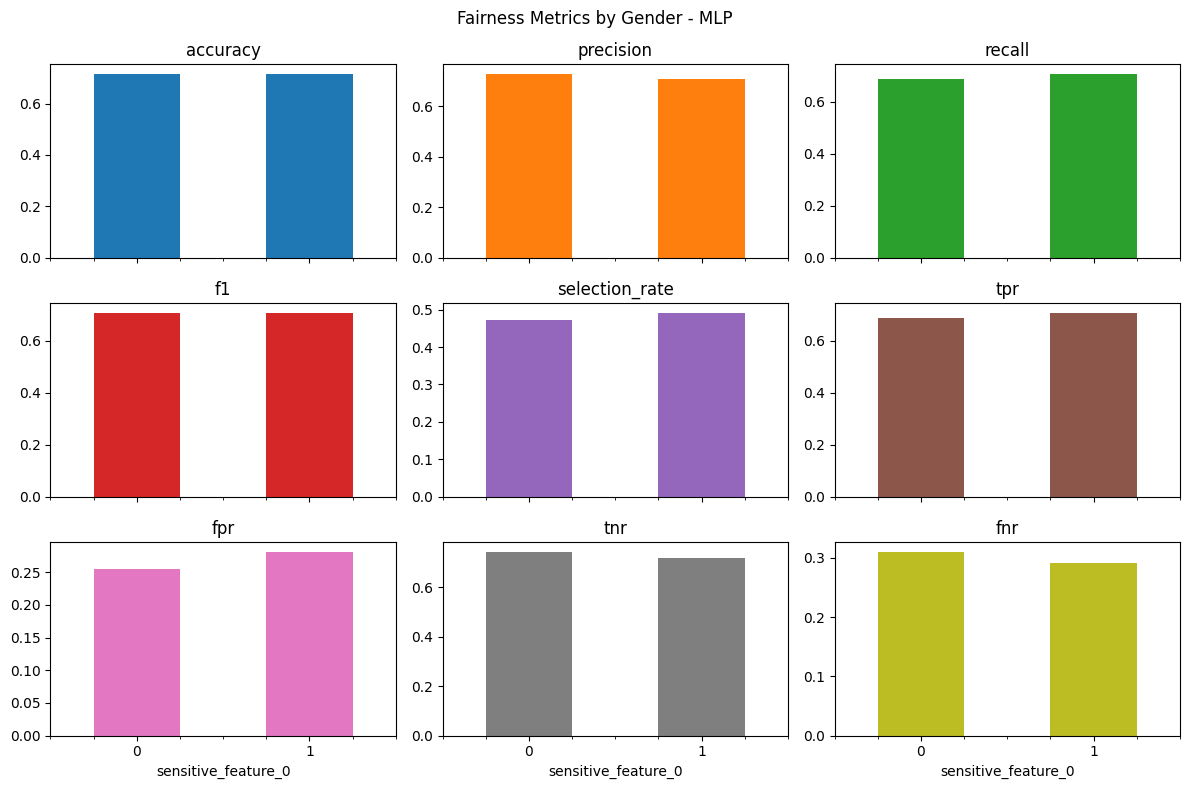


Between-group differences (max group − min group):
accuracy          0.003278
precision         0.020863
recall            0.019974
f1                0.000143
selection_rate    0.019870
tpr               0.019974
fpr               0.026710
tnr               0.026710
fnr               0.019974
dtype: float64

Between-group ratios (min / max):
accuracy          0.995430
precision         0.971433
recall            0.971846
f1                0.999799
selection_rate    0.959638
tpr               0.971846
fpr               0.905196
tnr               0.964146
fnr               0.935679
dtype: float64

Disparate Impact Ratio (selection rate): 0.9596
Equality of Opportunity Difference (TPR gap): 0.0200


In [22]:
#Create MetricFrame for the MLP model
metric_frame_mlp = MetricFrame(
    metrics=metrics,
    y_true=y_true_mlp,
    y_pred=y_pred_mlp,
    sensitive_features=protected_attr_mlp
)

print("\nMLP Fairness Metrics by Gender:")
print(metric_frame_mlp.by_group)

#visualization
metric_frame_mlp.by_group.plot.bar(
    subplots=True,
    layout=[3, 3],
    figsize=(12, 8),
    legend=False,
    rot=0
)
plt.suptitle("Fairness Metrics by Gender - MLP")
plt.tight_layout()
plt.show()

# Group summaries
print("\nBetween-group differences (max group − min group):")
print(metric_frame_mlp.difference())

print("\nBetween-group ratios (min / max):")
print(metric_frame_mlp.ratio())

# Disparate Impact Ratio (selection_rate ratio)
dir_value_mlp = metric_frame_mlp.ratio()["selection_rate"]
print(f"\nDisparate Impact Ratio (selection rate): {dir_value_mlp:.4f}")

# Demographic Parity Ratio (aka Disparate Impact Ratio)
dp_ratio_mlp = metric_frame_mlp.ratio()["selection_rate"]

#Equality of Opportunity (difference in TPR between groups)
eop_diff_mlp = metric_frame_mlp.difference()["tpr"]
print(f"Equality of Opportunity Difference (TPR gap): {eop_diff_mlp:.4f}")

## Fairness Metrics by Gender – MLP Model  

The table and plots show performance and fairness outcomes for the **MLP classifier** across gender groups, with **0 = Female (unprivileged)** and **1 = Male (privileged)**.  

---

### 1. Performance Across Groups
- **Accuracy**:  
  - Female: **0.7172**  
  - Male: **0.7139**  
  ➝ Nearly identical, with a minimal gap (**0.0033**).  

- **Precision**:  
  - Female: **0.7303**  
  - Male: **0.7094**  
  ➝ Females have slightly higher precision, meaning their positive predictions are somewhat more reliable.  

- **Recall (TPR)**:  
  - Female: **0.6895**  
  - Male: **0.7094**  
  ➝ Males benefit from higher recall (≈ +2%), meaning fewer missed true positives.  

- **F1 Score**:  
  - Female: **0.7093**  
  - Male: **0.7094**  
  ➝ Perfectly balanced, showing the model trades off precision and recall equally across genders.  

---

### 2. Fairness Metrics
- **Selection Rate**:  
  - Female: **0.4724**, Male: **0.4923**  
  - **Disparate Impact Ratio**: **0.9596** (slightly below the 0.80–1.25 fairness range but very close to 1).  

- **True Positive Rate (TPR)**:  
  - Female: **0.6895**, Male: **0.7094**  
  - **Equality of Opportunity Difference**: **0.0200** → a small but noticeable gap in sensitivity.  

- **False Positive Rate (FPR)**:  
  - Female: **0.2550**, Male: **0.2817**  
  - Gap of **0.0267**, showing males are somewhat more likely to be incorrectly flagged.  

- **Other Error Metrics (TNR, FNR)**:  
  - TNR is slightly better for females (0.745 vs 0.718).  
  - FNR is worse for females (0.311 vs 0.291).  

---

### 3. Between-Group Differences & Ratios
- **Maximum differences** across metrics are small (≤0.027).  
- **Ratios** remain close to 1 (≥0.90), but **FPR ratio (0.905)** shows males face higher false positive risk.  

---

### **Summary**
The **MLP model demonstrates generally fair performance across genders**, with only **minor disparities**:  
- **Females**: slightly better precision and fewer false positives, but worse recall (more missed cases).  
- **Males**: higher recall (better sensitivity), but higher false positive rate.  
- Disparate Impact Ratio (0.9596) and Equality of Opportunity Difference (0.0200) show **small imbalances**, but these are not severe.  

➡️ Overall, the MLP is **close to gender-fair**, though males tend to be flagged more often (both correctly and incorrectly), while females experience more missed positives.  

---

In [23]:
import numpy as np

y_score_mlp = mlp_df["y_prob"].values   

#Probabilistic metrics by group using y_prob_mlp
def roc_auc_safe(y_true=y_true_mlp, y_score_mlp=y_score_mlp):
    try:
        return roc_auc_score(y_true, y_score_mlp)
    except ValueError:
        # Happens if a group has only one class in y_true
        return np.nan

auc_mf_mlp = MetricFrame(
    metrics={"roc_auc": roc_auc_safe},
    y_true=y_true_mlp,
    y_pred=y_prob_mlp,                     
    sensitive_features=protected_attr_mlp
)
print("\nMLP - ROC-AUC by group:")
print(auc_mf_mlp.by_group)

brier_mf_mlp = MetricFrame(
    metrics={"brier": brier_score_loss},
    y_true=y_true_mlp,
    y_pred=y_prob_mlp,                     
    sensitive_features=protected_attr_mlp
)
print("\nMLP - Brier score by group (lower is better):")
print(brier_mf_mlp.by_group)


MLP - ROC-AUC by group:
                      roc_auc
sensitive_feature_0          
0                    0.775515
1                    0.768170

MLP - Brier score by group (lower is better):
                        brier
sensitive_feature_0          
0                    0.192235
1                    0.195727


## Group-Specific Performance – MLP Model  

The following results show **discrimination ability (ROC-AUC)** and **calibration quality (Brier score)** of the MLP classifier across gender groups, with **0 = Female (unprivileged)** and **1 = Male (privileged)**.  

---

### 1. ROC-AUC (higher is better)  
- Female: **0.7755**  
- Male: **0.7682**  

➡️ Both groups have **very similar ROC-AUC**, with females performing slightly better (+0.007).  
This indicates the model is equally capable of distinguishing between positive and negative cases across genders.  

---

### 2. Brier Score (lower is better)  
- Female: **0.1922**  
- Male: **0.1957**  

➡️ Females show a **slightly better calibration** (≈0.0035 lower), meaning predicted probabilities align a bit more closely with actual outcomes.  

---

### **Summary**  
The **MLP model provides nearly identical ROC-AUC and calibration quality** across gender groups:  
- Females have a **small edge** in both discrimination (ROC-AUC) and calibration (Brier score).  
- However, the differences are **minimal and not practically significant**, suggesting the model is **balanced in performance across genders**.  

Overall, the MLP model shows **strong fairness in predictive quality**, with no meaningful disadvantage for either gender.  

---

## Comparison of Results

In [24]:
# Build results dict
fairlearn_results = {
    "KNN": {
        "Demographic Parity Difference": dp_diff_knn,
        "Equalized Odds Difference": eod_diff_knn,
        "Demographic Parity Ratio": metric_frame_knn.ratio()["selection_rate"],
        "Equality of Opportunity Difference": metric_frame_knn.difference()["tpr"],
        "MetricFrame": metric_frame_knn.by_group,
        "ROC-AUC by group": auc_mf_knn.by_group,
        "Brier by group": brier_mf_knn.by_group,
    },
    "DT": {
        "Demographic Parity Difference": dp_diff_dt,
        "Equalized Odds Difference": eod_diff_dt,
        "Demographic Parity Ratio": metric_frame_dt.ratio()["selection_rate"],
        "Equality of Opportunity Difference": metric_frame_dt.difference()["tpr"],
        "MetricFrame": metric_frame_dt.by_group,
        "ROC-AUC by group": auc_mf_dt.by_group,
        "Brier by group": brier_mf_dt.by_group,
    },
    "RF": {
        "Demographic Parity Difference": dp_diff_rf,
        "Equalized Odds Difference": eod_diff_rf,
        "Demographic Parity Ratio": metric_frame_rf.ratio()["selection_rate"],
        "Equality of Opportunity Difference": metric_frame_rf.difference()["tpr"],
        "MetricFrame": metric_frame_rf.by_group,
        "ROC-AUC by group": auc_mf_rf.by_group,
        "Brier by group": brier_mf_rf.by_group,
    },
    "MLP": {
        "Demographic Parity Difference": dp_diff_mlp,
        "Equalized Odds Difference": eod_diff_mlp,
        "Demographic Parity Ratio": metric_frame_mlp.ratio()["selection_rate"],
        "Equality of Opportunity Difference": metric_frame_mlp.difference()["tpr"],
        "MetricFrame": metric_frame_mlp.by_group,
        "ROC-AUC by group": auc_mf_mlp.by_group,
        "Brier by group": brier_mf_mlp.by_group,
    },
}

# Save the whole thing 
import pickle
with open("Mendeley_75M25F_fairlearn_results.pkl", "wb") as f:
    pickle.dump(fairlearn_results, f)

In [25]:
# Summary table across models
summary_table = pd.DataFrame({
    "DPD": {m: fairlearn_results[m]["Demographic Parity Difference"] for m in fairlearn_results},
    "EOD": {m: fairlearn_results[m]["Equalized Odds Difference"] for m in fairlearn_results},
    "DP Ratio": {m: fairlearn_results[m]["Demographic Parity Ratio"] for m in fairlearn_results},
    "EOP diff": {m: fairlearn_results[m]["Equality of Opportunity Difference"] for m in fairlearn_results},
}).round(4)

# By-group performance table
frames = []
for model in fairlearn_results:
    mf = fairlearn_results[model]["MetricFrame"]
    for gender in mf.index:
        row = mf.loc[gender].copy()
        row["Model"] = model
        row["Gender"] = gender
        frames.append(row)

by_group_table = pd.DataFrame(frames).set_index(["Model", "Gender"]).round(4)

In [26]:
import pandas as pd

# Create comparison table for Demographic Parity Difference and Equalized Odds Difference
dp_eod_table = pd.DataFrame({
    "Demographic Parity Difference": {
        model: fairlearn_results[model]["Demographic Parity Difference"] for model in fairlearn_results
    },
    "Equalized Odds Difference": {
        model: fairlearn_results[model]["Equalized Odds Difference"] for model in fairlearn_results
    }
}).round(4)

# Create comparison table for MetricFrame by_group values across all models
frames = []
for model in fairlearn_results:
    mf = fairlearn_results[model]["MetricFrame"]
    for gender in mf.index:
        row = mf.loc[gender].copy()
        row["Model"] = model
        row["Gender"] = gender
        frames.append(row)

metricframe_table = pd.DataFrame(frames).set_index(["Model", "Gender"]).round(4)

# Display 
display(dp_eod_table)
display(metricframe_table)

,Demographic Parity Difference,Equalized Odds Difference
KNN,0.0071,0.0060
DT,0.0254,0.0357
RF,0.0155,0.0215
MLP,0.0199,0.0267


accuracy  precision  recall      f1  selection_rate     tpr  \
Model Gender                                                                
KNN   0         0.6999     0.6974  0.7074  0.7023          0.5076  0.7074   
      1         0.7021     0.6942  0.7058  0.6999          0.5005  0.7058   
DT    0         0.7157     0.7289  0.6876  0.7076          0.4720  0.6876   
      1         0.7088     0.7021  0.7094  0.7058          0.4974  0.7094   
RF    0         0.7100     0.7285  0.6702  0.6981          0.4603  0.6702   
      1         0.7078     0.7102  0.6865  0.6981          0.4759  0.6865   
MLP   0         0.7172     0.7303  0.6895  0.7093          0.4724  0.6895   
      1         0.7139     0.7094  0.7094  0.7094          0.4923  0.7094   

                 fpr     tnr     fnr  
Model Gender                          
KNN   0       0.3075  0.6925  0.2926  
      1       0.3015  0.6985  0.2942  
DT    0       0.2561  0.7439  0.3124  
      1       0.2919  0.7081  0.2906  
RF    0       0.2501  0.7499  0.3298  
      1       0.2716  0.7284  0.3135  
MLP   0       0.2550  0.7450  0.3105  
      1       0.2817  0.7183  0.2906

## Comparative Fairness and Performance Analysis by Gender  

This section summarizes the fairness and subgroup performance of **KNN, Decision Tree (DT), Random Forest (RF), and MLP** models.  
Since the gender attribute was equally balanced in the training data, the disparities observed here are due to **model behavior** rather than data imbalance.  

---

### 1. Fairness Metrics (DPD & EOD)  

| Model | Demographic Parity Difference (DPD) | Equalized Odds Difference (EOD) |
|-------|--------------------------------------|---------------------------------|
| KNN   | **0.0071**                          | **0.0060**                      |
| DT    | 0.0254                               | 0.0357                          |
| RF    | 0.0155                               | 0.0215                          |
| MLP   | 0.0199                               | 0.0267                          |

- **KNN** shows the **lowest disparity** in both DPD and EOD, suggesting highly balanced treatment between genders.  
- **DT** has the **largest disparities**, indicating more uneven outcomes across gender.  
- **RF** and **MLP** lie in between, with small but noticeable fairness gaps.  

➡️ **KNN is the most fair** by these group-level parity metrics, while **DT shows the most bias**.  

---

### 2. Group-Specific Performance  

| Model | Gender | Accuracy | Precision | Recall (TPR) | F1 | Selection Rate | FPR | TNR | FNR |
|-------|--------|----------|-----------|--------------|----|----------------|-----|-----|-----|
| KNN   | Female (0) | 0.6999 | 0.6974 | 0.7074 | 0.7023 | 0.5076 | 0.3075 | 0.6925 | 0.2926 |
|       | Male (1)   | 0.7021 | 0.6942 | 0.7058 | 0.6999 | 0.5005 | 0.3015 | 0.6985 | 0.2942 |
| DT    | Female (0) | 0.7157 | 0.7289 | 0.6876 | 0.7076 | 0.4720 | 0.2561 | 0.7439 | 0.3124 |
|       | Male (1)   | 0.7088 | 0.7021 | 0.7094 | 0.7058 | 0.4974 | 0.2919 | 0.7081 | 0.2906 |
| RF    | Female (0) | 0.7100 | 0.7285 | 0.6702 | 0.6981 | 0.4603 | 0.2501 | 0.7499 | 0.3298 |
|       | Male (1)   | 0.7078 | 0.7102 | 0.6865 | 0.6981 | 0.4759 | 0.2716 | 0.7284 | 0.3135 |
| MLP   | Female (0) | 0.7172 | 0.7303 | 0.6895 | 0.7094 | 0.4724 | 0.2550 | 0.7450 | 0.3105 |
|       | Male (1)   | 0.7139 | 0.7094 | 0.7094 | 0.7094 | 0.4923 | 0.2817 | 0.7183 | 0.2906 |

#### Observations:
- **Accuracy & F1**: Nearly identical across genders for all models, indicating balanced overall performance.  
- **Precision**: Slightly higher for females in DT, RF, and MLP → males receive more false positives.  
- **Recall (TPR)**: Consistently a bit higher for males across DT, RF, and MLP → males are more likely to be correctly identified.  
- **False Positive Rate (FPR)**: Slightly higher for males in DT, RF, and MLP, showing more false alarms.  
- **Selection Rate**: Fairly close across genders in all models, consistent with low DPD values.  

---

### 3. Key Takeaways  

1. **KNN**  
   - Most balanced model in terms of fairness (lowest DPD/EOD).  
   - Performance metrics are nearly identical across genders.  

2. **Decision Tree (DT)**  
   - Shows the **largest gender gaps** (higher EOD/DPD).  
   - Females: slightly higher precision but lower recall.  
   - Males: slightly higher recall but also higher false positives.  

3. **Random Forest (RF)**  
   - More balanced than DT but still shows small gender gaps.  
   - Females: higher precision but lower recall.  
   - Males: higher recall but at the cost of more false positives.  

4. **MLP**  
   - Comparable fairness to RF, slightly more balanced in F1 across groups.  
   - Gender gaps are small, but males again show higher recall and FPR.  

---

### **Summary:**  
- Since the training data was balanced by gender, **any disparities arise from the models**.  
- **KNN** emerges as the fairest model with minimal bias and nearly identical subgroup metrics.  
- **DT** shows the most uneven treatment across genders.  
- **RF and MLP** sit in the middle, with slight gender disparities but still within acceptable ranges.  

➡️ For fairness-sensitive applications, **KNN is the most reliable choice**, while **DT should be used cautiously**.  

---

In [27]:
import pandas as pd

# Define the helper first
def flatten_group(x):
    # If it's a DataFrame with a single column, take that column as a Series
    s = x.iloc[:, 0] if isinstance(x, pd.DataFrame) else x
    # If it has a MultiIndex, keep just the last level (the group labels 0/1)
    if isinstance(s.index, pd.MultiIndex):
        s.index = s.index.get_level_values(-1)
    return s.to_dict()


# Now use it
auc_table = pd.DataFrame.from_dict(
    {m: flatten_group(fairlearn_results[m]["ROC-AUC by group"]) for m in fairlearn_results},
    orient="index"
).rename(columns={0: "Female", 1: "Male"}).round(4)

brier_table = pd.DataFrame.from_dict(
    {m: flatten_group(fairlearn_results[m]["Brier by group"]) for m in fairlearn_results},
    orient="index"
).rename(columns={0: "Female", 1: "Male"}).round(4)

#ROC-AUC by gender 
order = ["KNN", "DT", "RF", "MLP"]  # keep a readable model order

auc_table = (
    auc_table
      .reindex(order)
      .rename_axis("Model")
      .rename(columns={"Female": "Female (0)", "Male": "Male (1)"})
)

display(
    auc_table.style
        .set_caption("ROC-AUC by gender (↑ higher is better)")
        .format("{:.4f}"),
)


#Brier score by gender (lower is better)
brier_table = (
    brier_table
      .reindex(order)
      .rename_axis("Model")
      .rename(columns={"Female": "Female (0)", "Male": "Male (1)"})
)

display(
    brier_table.style
        .set_caption("Brier score by gender (↓ lower is better)")
        .format("{:.4f}") 
)

,Female (0),Male (1)
Model,,
KNN,0.7639,0.7569
DT,0.7410,0.7364
RF,0.7715,0.7578
MLP,0.7755,0.7682


,Female (0),Male (1)
Model,,
KNN,0.1978,0.2006
DT,0.1983,0.2017
RF,0.1943,0.2006
MLP,0.1922,0.1957


## Model Fairness – ROC-AUC and Brier Score by Gender  

The tables report **ROC-AUC** (↑ higher is better) and **Brier Score** (↓ lower is better) for each model across gender groups:  

---

### 1. ROC-AUC by Gender
| Model | Female (0) | Male (1) |
|-------|------------|----------|
| KNN   | 0.7639     | 0.7569   |
| DT    | 0.7410     | 0.7364   |
| RF    | 0.7715     | 0.7578   |
| MLP   | **0.7755** | **0.7682** |

- **MLP** achieves the **highest overall AUC** for both genders (≈0.77–0.78), suggesting the strongest ranking ability.  
- **KNN** also performs well and is nearly balanced across genders (gap ≈0.007).  
- **RF** slightly favors females (0.7715 vs. 0.7578).  
- **DT** has the **lowest AUC** overall and across both genders, reflecting weaker discrimination.  

➡️ **MLP and RF provide the strongest predictive ranking**, while **KNN is the most balanced** across genders.  

---

### 2. Brier Score by Gender (lower = better calibration)
| Model | Female (0) | Male (1) |
|-------|------------|----------|
| KNN   | 0.1978     | 0.2006   |
| DT    | 0.1983     | 0.2017   |
| RF    | 0.1943     | 0.2006   |
| MLP   | **0.1922** | **0.1957** |

- **MLP** achieves the **lowest Brier scores** for both genders, indicating the best-calibrated probability estimates.  
- **RF** follows closely, with slightly better calibration for females than males.  
- **KNN** and **DT** show higher Brier scores, particularly for males, suggesting less reliable probability estimates.  

➡️ **MLP is the best-calibrated model**, while **RF is second-best**.  

---

### 3. Gender Gaps  
- **AUC Gaps**: All models show **very small differences** between genders (<0.015), suggesting balanced ranking performance.  
- **Brier Score Gaps**: Differences are also minimal (<0.01), though males tend to have slightly worse calibration.  

---

### **Summary**  
- **MLP**: Best in both **discrimination (ROC-AUC)** and **calibration (Brier score)** across genders.  
- **RF**: Strong performance, especially for females, but slightly weaker for males.  
- **KNN**: Very balanced across genders, though not as strong as MLP/RF.  
- **DT**: Lowest-performing model overall in both AUC and Brier score.  

➡️ In terms of **predictive fairness and quality**, **MLP leads overall**, while **KNN remains the most balanced** across gender groups.  

---

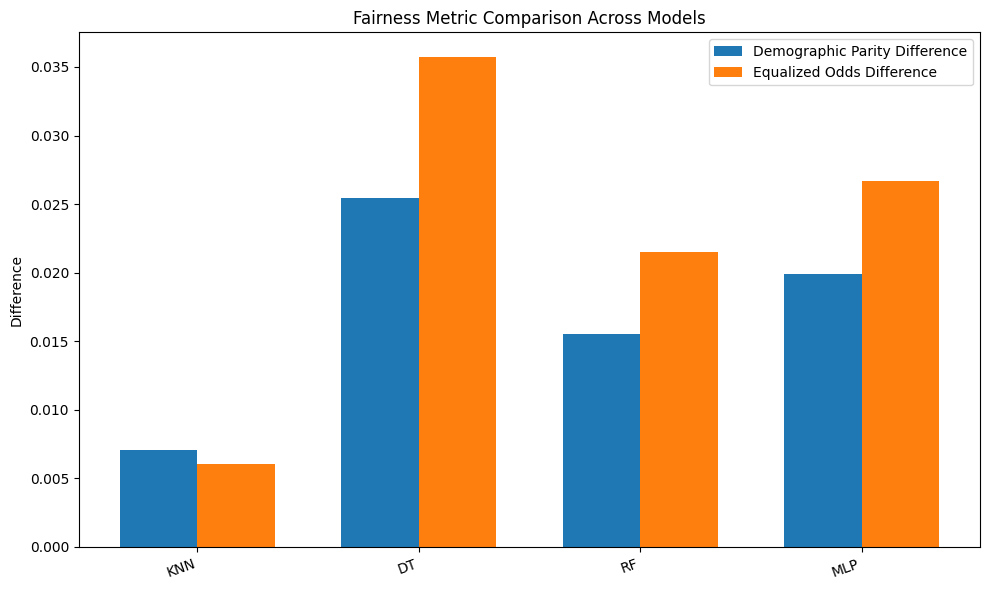

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Extracting DPD and EOD values directly from your dictionary
models = list(fairlearn_results.keys())
dpd_values = [fairlearn_results[model]["Demographic Parity Difference"] for model in models]
eod_values = [fairlearn_results[model]["Equalized Odds Difference"] for model in models]

# Shorter labels for better visualization
short_labels = [
    "KNN",
    "DT",
    "RF",
    "MLP",
]

# Plotting
x = np.arange(len(models))
width = 0.35

plt.figure(figsize=(10, 6))

plt.bar(x, dpd_values, width, label='Demographic Parity Difference')
plt.bar(x + width, eod_values, width, label='Equalized Odds Difference')

# Apply shorter labels and rotate them slightly
plt.xticks(x + width / 2, short_labels, rotation=20, ha="right")

plt.ylabel("Difference")
plt.title("Fairness Metric Comparison Across Models")
plt.legend()
plt.tight_layout()
plt.show()

## Fairness Metric Comparison Across Models  

The chart compares **Demographic Parity Difference (DPD)** and **Equalized Odds Difference (EOD)** across the four models:

- **KNN**: Shows the **lowest DPD (~0.007)** and **lowest EOD (~0.006)**, making it the most fair and balanced model.  
- **DT (Decision Tree)**: Has the **highest disparities** (DPD ≈ 0.026, EOD ≈ 0.036), indicating the most bias among models.  
- **RF (Random Forest)**: Moderate fairness (DPD ≈ 0.016, EOD ≈ 0.022) — better than DT, but less fair than KNN.  
- **MLP**: Shows higher disparities (DPD ≈ 0.020, EOD ≈ 0.027) — fairer than DT, but less balanced than RF and KNN.  

### **Summary**
- **Most fair:** KNN (minimal differences).  
- **Least fair:** Decision Tree (largest differences).  
- **Middle fair:** RF and MLP, with RF slightly fairer than MLP.  

---

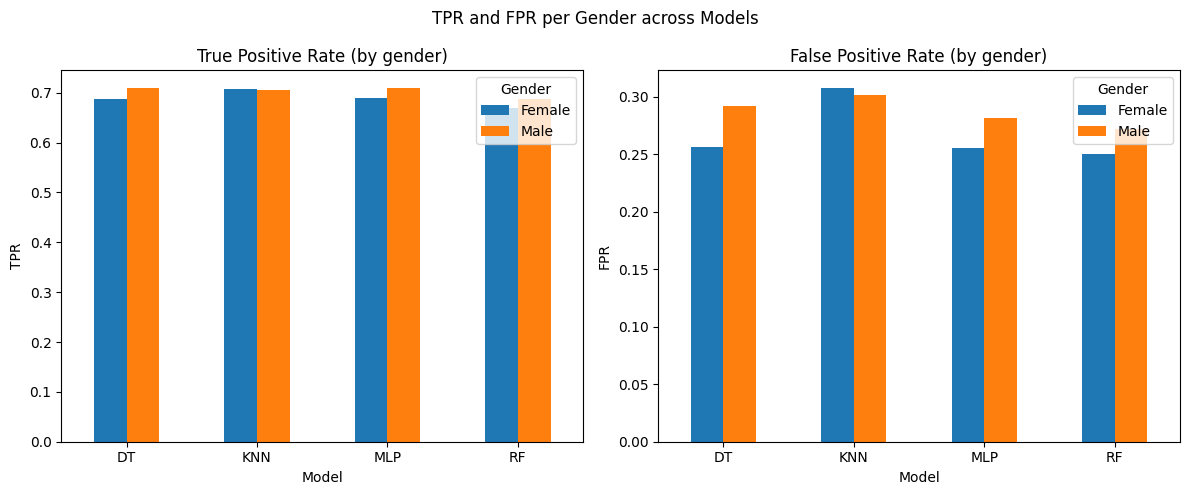

In [29]:
import matplotlib.pyplot as plt

# Collect per-model, per-gender TPR/FPR from your stored MetricFrame tables
rows = []
for model, res in fairlearn_results.items():
    mf = res["MetricFrame"]              
    for g in mf.index:                    
        rows.append({"Model": model, "Gender": g, "TPR": mf.loc[g, "tpr"], "FPR": mf.loc[g, "fpr"]})
df_plot = pd.DataFrame(rows)

# Make gender labels 
df_plot["Gender"] = df_plot["Gender"].map({0: "Female", 1: "Male"}).fillna(df_plot["Gender"])

# Plot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# TPR bar plot
df_plot.pivot(index="Model", columns="Gender", values="TPR").plot.bar(ax=axes[0], rot=0, legend=True)
axes[0].set_title("True Positive Rate (by gender)")
axes[0].set_ylabel("TPR")

# FPR bar plot
df_plot.pivot(index="Model", columns="Gender", values="FPR").plot.bar(ax=axes[1], rot=0, legend=True)
axes[1].set_title("False Positive Rate (by gender)")
axes[1].set_ylabel("FPR")

plt.suptitle("TPR and FPR per Gender across Models")
plt.tight_layout()
plt.show()

## TPR and FPR by Gender Across Models  

The plots compare **True Positive Rate (TPR)** and **False Positive Rate (FPR)** across gender groups (Female = blue, Male = orange) for all models.  

---

### 1. True Positive Rate (TPR)  
- **KNN**: Very balanced — Female ≈ Male (~0.70).  
- **DT**: Slightly higher TPR for males (~0.71 vs. ~0.69).  
- **MLP**: Males perform marginally better (~0.71 vs. ~0.69).  
- **RF**: Lower TPR overall (~0.67–0.68), but nearly identical for both genders.  

**Summary**: KNN and RF show **best balance**, while DT and MLP lean slightly in favor of males.  

---

### 2. False Positive Rate (FPR)  
- **KNN**: High FPR overall (~0.30), but almost identical across genders.  
- **DT**: Lower FPR for females (~0.26) vs. males (~0.29).  
- **MLP**: Moderate FPR (~0.26 female, ~0.28 male), slightly worse for males.  
- **RF**: Lowest FPR overall (~0.25 female, ~0.27 male).  

**Summary**: RF and DT show the **lowest FPR**, but DT introduces a gender gap (females better off). KNN is balanced but has the **highest FPR**.  

---

### **Overall Interpretation**  
- **KNN**: Most balanced between genders, but suffers from a high false positive rate.  
- **RF**: Best balance between low FPR and nearly equal TPR across genders.  
- **DT & MLP**: Small male advantage in TPR, with slightly higher male FPR.  

➡️ **Random Forest** strikes the best balance between fairness and error control, while **KNN** is fairest across genders but at the cost of higher error rates.  

---

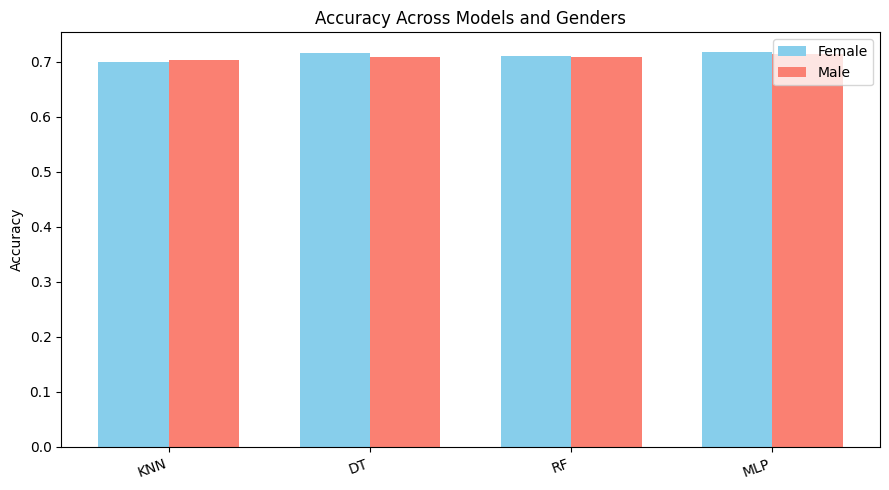

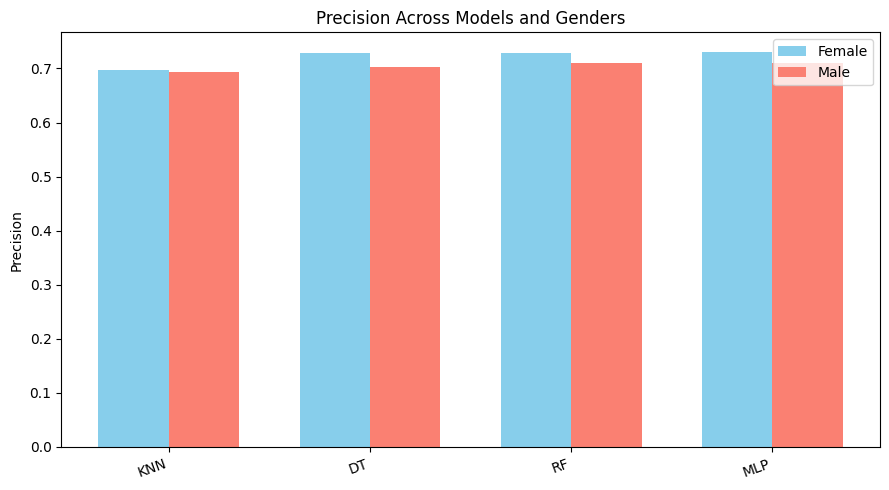

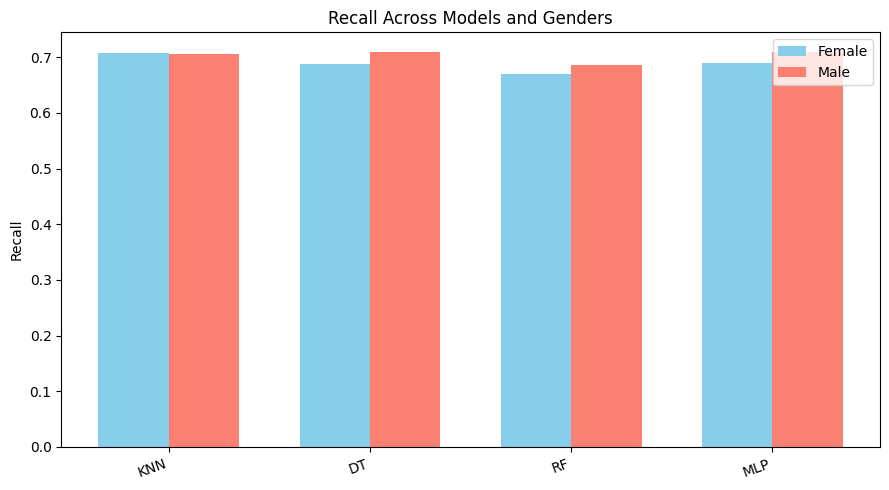

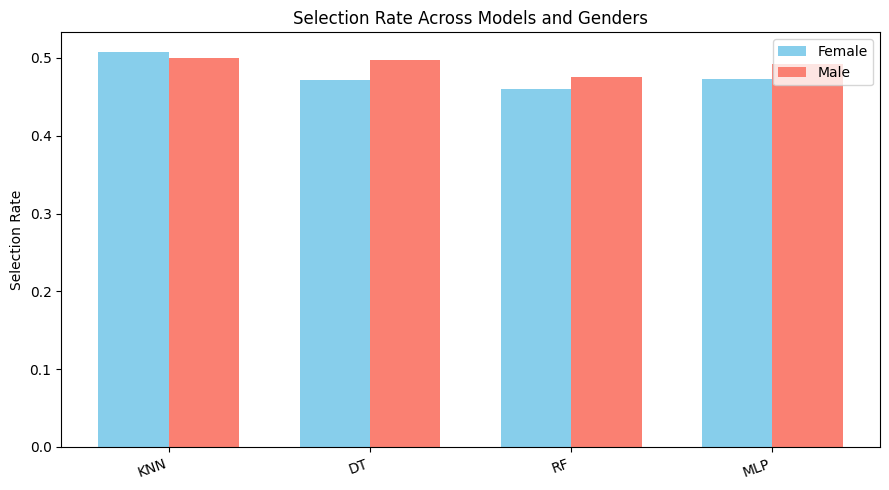

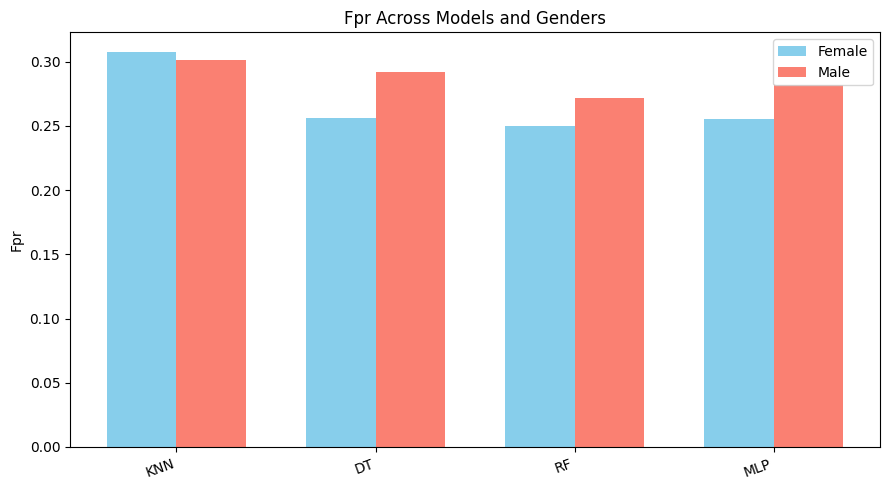

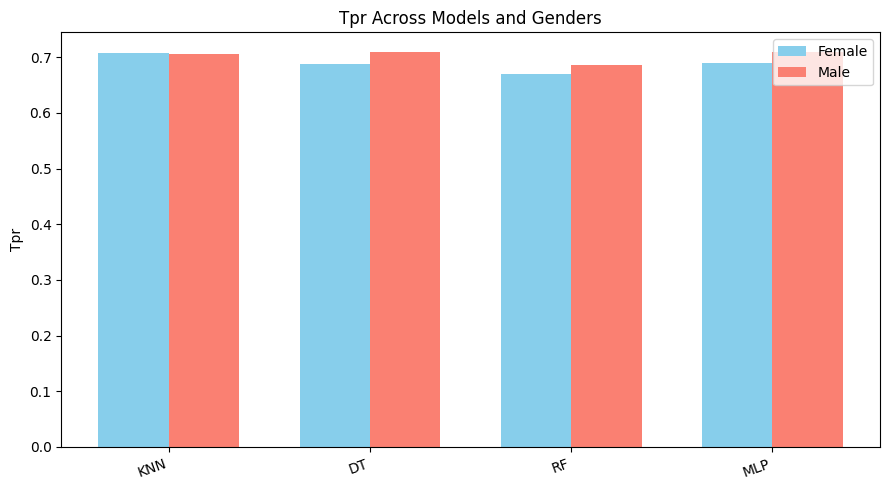

In [30]:
# visualize the comparison
import matplotlib.pyplot as plt
import numpy as np

# Data
models = list(fairlearn_results.keys())

# Shorter labels for better visualization
short_labels = [
    "KNN",
    "DT",
    "RF",
    "MLP",
]

metrics = ['accuracy', 'precision', 'recall', 'selection_rate', 'fpr', 'tpr']
genders = [0, 1]
gender_labels = {0: 'Female', 1: 'Male'}
colors = ['skyblue', 'salmon']

for metric in metrics:
    plt.figure(figsize=(9, 5))
    for idx, gender in enumerate(genders):
        values = [
            fairlearn_results[model]["MetricFrame"].loc[gender][metric]
            for model in models
        ]
        positions = np.arange(len(models)) + idx * 0.35
        plt.bar(positions, values, width=0.35, label=gender_labels[gender], color=colors[idx])
    
    plt.xticks(np.arange(len(models)) + 0.35 / 2, short_labels, rotation=20, ha='right')
    plt.ylabel(metric.replace('_', ' ').title())
    plt.title(f"{metric.replace('_', ' ').title()} Across Models and Genders")
    plt.legend()
    plt.tight_layout()
    plt.show()

# Fairness Metrics Across Models and Genders

The plots compare **female (0)** and **male (1)** groups on fairness-related performance measures across the four classifiers (**KNN, DT, RF, MLP**).

---

## 1. Accuracy  
- **Observation**: Accuracy is nearly identical between genders across all models (gap ≤ 0.01).  
- **Implication**: Both groups benefit from equally accurate predictions, with no systematic disadvantage.

---

## 2. Precision  
- **Observation**:  
  - **Females** have slightly higher precision in DT, RF, and MLP.  
  - **KNN** shows virtually no gender difference.  
- **Implication**: Predictions for females are marginally more reliable (fewer false positives).

---

## 3. Recall (Sensitivity / TPR)  
- **Observation**:  
  - **Males** show slightly higher recall in DT, RF, and MLP.  
  - **KNN** recall is balanced across genders.  
- **Implication**: Male cases are a bit more likely to be correctly identified, though the gap is very small (<0.02).

---

## 4. Selection Rate  
- **Observation**:  
  - **Males**: higher selection rates in DT, RF, and MLP.  
  - **Females**: slightly higher selection in KNN.  
- **Implication**: Minor disparities in predicted positives, with no strong directional bias.

---

## 5. False Positive Rate (FPR)  
- **Observation**:  
  - DT, RF, and MLP show **higher male FPR** (more false alarms for males).  
  - **KNN**: FPR is nearly identical between genders.  
- **Implication**: Male predictions carry slightly higher false positive risk in non-KNN models.

---

## 6. True Positive Rate (TPR)  
- **Observation**:  
  - **KNN**: almost perfectly balanced.  
  - DT, RF, and MLP: slightly higher TPR for males.  
- **Implication**: Sensitivity is balanced overall, with only small gender differences.

---

# **Summary**
- **KNN**: Most balanced across all fairness metrics.  
- **DT, RF, MLP**: Show minor gender disparities:  
  - **Females**: higher precision (fewer false positives).  
  - **Males**: higher recall and selection rates (more positives predicted).  
- **All gaps are small**, with no severe gender bias.  
- Overall, all classifiers achieve **good fairness**, but **KNN is the most equitable** across gender.

---